In [115]:
#Importing the required libraries for Lending Club Case Study
import pandas as pd #Libraray used for dataframe
import numpy as np #Libraray used for numerical python
import seaborn as sns #Libraray used for data visualization
import matplotlib.pyplot as plt #Libraray used for plotting
import warnings #Libraray used to ignore warnings due to version problems
warnings.filterwarnings('ignore')

In [116]:
#reading the data
loanData = pd.read_csv("loan.csv",encoding = "ISO-8859-1", low_memory=False)

In [117]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [118]:
loanData.shape

(39717, 111)

In [119]:
loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## NULL Data : Remove 
- We can clearly able to see that,  lot of columns with all NULL values:

In [120]:
loanData.dropna(axis = 1, how = 'all', inplace = True)
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Columns with SINGLE value : Remove
- We cannot able to use single value column, since it will not contribute in analysis

In [121]:
loanData.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Columns Which helpful for Loan Approval
- As we have analysed the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them. 
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

In [122]:
loanData.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [123]:
loanData.shape

(39717, 21)

In [124]:
loanData.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

#### Analysis of Loan Repayment Status
- Understand the loan repayment status of borrowers:

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


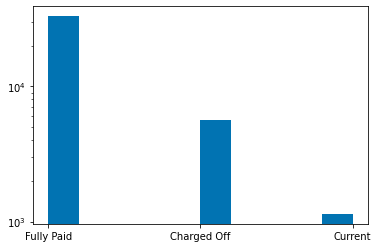

In [126]:
print(loanData['loan_status'].value_counts())
plt.hist(loanData['loan_status'])
plt.yscale('log')

In [127]:
loanData = loanData[loanData.loan_status != "Current"]
loanData.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Missing Values
- Checking the missing values here

In [128]:
(loanData.isna().sum()/len(loanData.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

## Missing Values : Handling
 - There are columns with missing values like "emp_length", "revol_util". 
 - We have to check what kind of data each columns is containing

In [129]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [130]:
print("Employment Length : " + loanData.emp_length.mode()[0])
loanData.emp_length.value_counts()

Employment Length : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

- As per above value counts, the mode value has far higher frequency than that of the next most frequent value
- So, we can assign the value of Employment Length to the null values in the column

In [131]:
loanData.emp_length.fillna(loanData.emp_length.mode()[0], inplace = True)
loanData.emp_length.isna().sum()

0

In [132]:
loanData.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loanData.revol_util.isna().sum()

0

## Data Standarization
- "int_rate" and "revol_util" column is a object column, it has continous values
- If "emp_length" < 1 year then it is assumed as 0
- if "emp_length" > 10, then it is assumed as 10

In [133]:
loanData.revol_util = pd.to_numeric(loanData.revol_util.apply(lambda x : x.split('%')[0]))

In [134]:
loanData.int_rate = pd.to_numeric(loanData.int_rate.apply(lambda x : x.split('%')[0]))

In [135]:
loanData.emp_length = pd.to_numeric(loanData.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [136]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Fixing Outlier Data

<AxesSubplot:xlabel='annual_inc'>

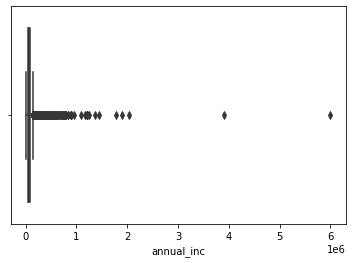

In [137]:
sns.boxplot(loanData['annual_inc'])

- Removing Outliers data in quantile info
- Values after 95 percentile having huge increase in the value for small quantile variation
- We are taking threshold for removing outliers as 0.95

In [138]:
quantile_info = loanData.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [139]:
per95AnnualInc = loanData['annual_inc'].quantile(0.95)
loanData = loanData[loanData.annual_inc <= per95AnnualInc]

<AxesSubplot:xlabel='annual_inc'>

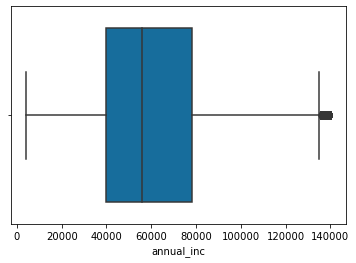

In [140]:
sns.boxplot(loanData.annual_inc)

- After fixing the "annual_inc" data. We are checking dti, loan_amnt and funded_amnt_inv

<AxesSubplot:xlabel='dti'>

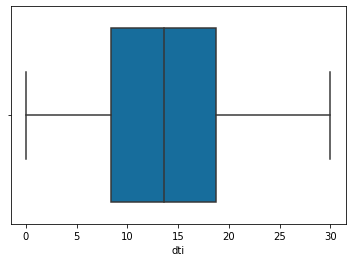

In [141]:
sns.boxplot(loanData.dti)

<AxesSubplot:xlabel='loan_amnt'>

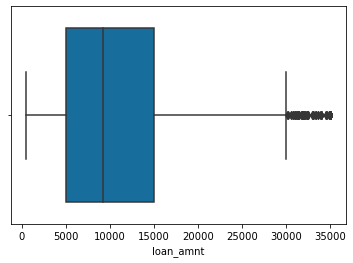

In [142]:
sns.boxplot(loanData.loan_amnt)

In [143]:
loanData.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

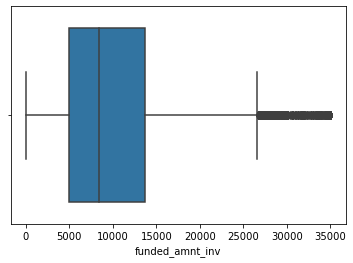

In [31]:
sns.boxplot(loanData.funded_amnt_inv)

In [144]:
loanData.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- There are some values far from distribution
- Therefore, we are not removing outliers / extreme values for these above columns

## Analysis of Categorical Data 
- Grade column, extracting only subgrade (int level value) from the sub_grade variable
- So, we have analyse the defaulter data
- Subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

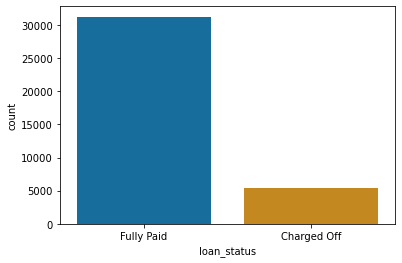

In [145]:
sns.countplot(x = 'loan_status', data = loanData)

In [146]:
loanData.sub_grade = pd.to_numeric(loanData.sub_grade.apply(lambda x : x[-1]))
loanData.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

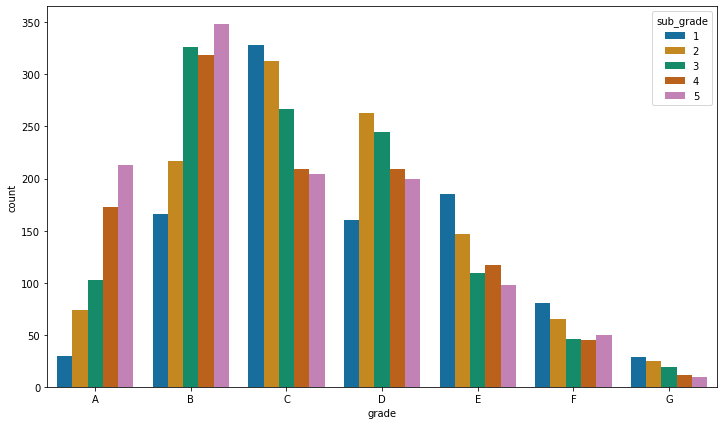

In [147]:
fig, ax = plt.subplots(figsize=(12,7))
sns.color_palette("rocket")
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loanData[loanData.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

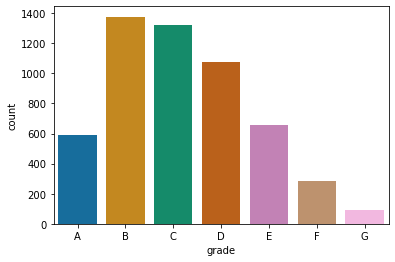

In [148]:
sns.countplot(x = 'grade', data = loanData[loanData.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Checking Home Ownership Variable
- What is the unique values for home_ownership
- Here we are replacing 'NONE' with 'OTHERS'

In [149]:
loanData['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [150]:
loanData['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [151]:
loanData['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

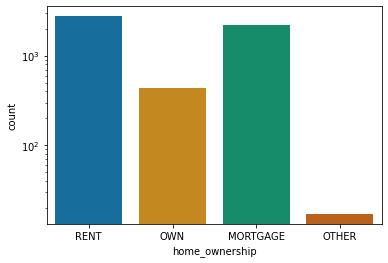

In [152]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data = loanData[loanData['loan_status']=='Charged Off'])

####  Checking : Purpose of Loan
- Bivariate Analysis on purpose of Loan against Charged off

<AxesSubplot:xlabel='count', ylabel='purpose'>

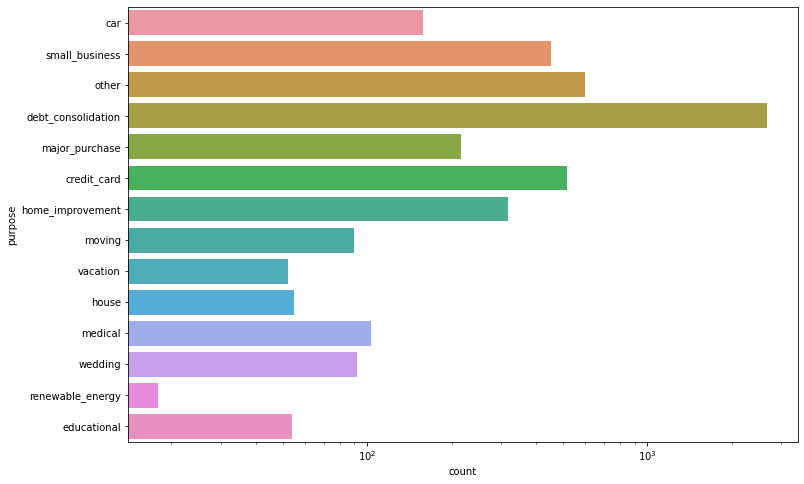

In [153]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data = loanData[loanData.loan_status == 'Charged Off'])

### Bins for Numerical Variable to convert in Category

In [223]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loanData['InterestRateGrp'] = pd.cut(loanData['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loanData['OpenAccGrp'] = pd.cut(loanData['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loanData['RevolUtilGrp'] = pd.cut(loanData['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loanData['TotalAccGrp'] = pd.cut(loanData['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loanData['AnnualIncGrp'] = pd.cut(loanData['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [155]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing the interest Rate

Text(0.5, 0, 'Interest Rate')

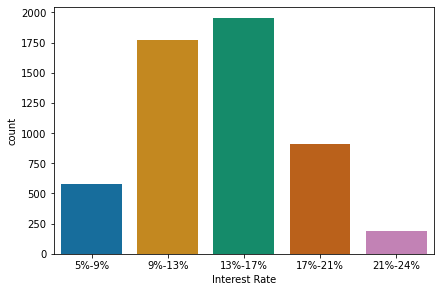

In [224]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='InterestRateGrp', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

Text(0.5, 0, 'Employment Length')

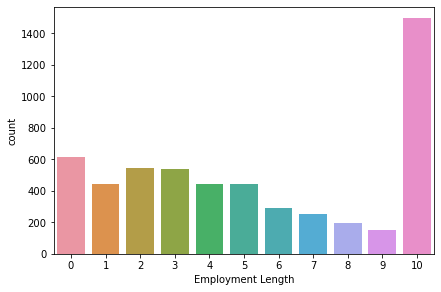

In [225]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(222)
sns.countplot(x='emp_length', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Employment Length')

#### Let's analyse open_acc, revol_util, total_acc and annual_inc

Text(0.5, 0, 'Open Account')

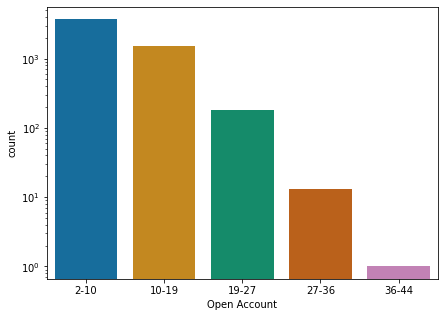

In [226]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='OpenAccGrp', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Open Account')

Text(0.5, 0, 'Revol Util Rate')

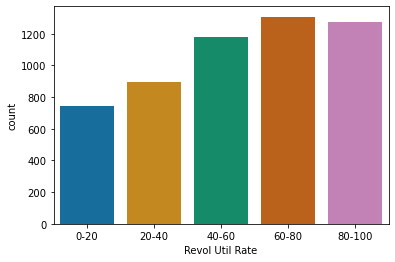

In [227]:
sns.countplot(x='RevolUtilGrp', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Revol Util Rate')

Text(0.5, 0, 'Total Account')

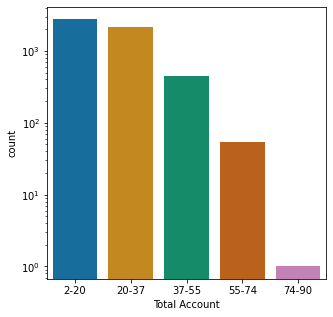

In [229]:
fig, ax = plt.subplots(figsize = (5,5))
ax.set_yscale('log')
sns.countplot(x='TotalAccGrp', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Total Account')

Text(0.5, 0, 'Annual Income')

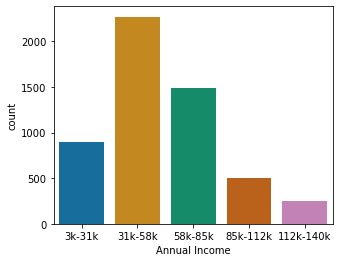

In [231]:
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(x='AnnualIncGrp', data=loanData[loanData.loan_status == 'Charged Off'])
plt.xlabel('Annual Income')

Text(0, 0.5, 'Term')

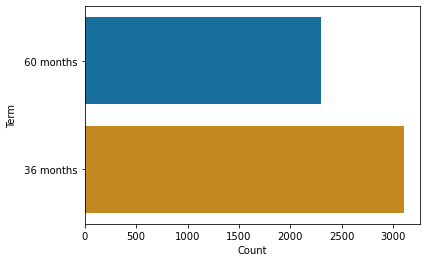

In [232]:
sns.countplot(y='term', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Count')
plt.ylabel('Term')

Text(0.5, 0, 'Verification Status')

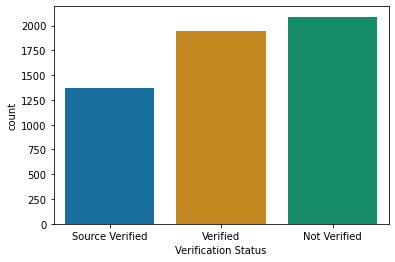

In [233]:
sns.countplot(x='verification_status', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Verification Status')

Text(0.5, 0, 'inquiry Last 6 Month')

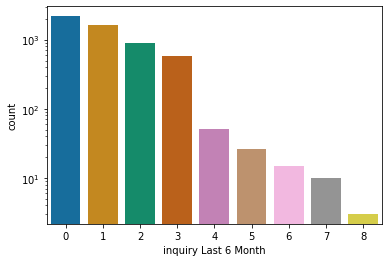

In [234]:
fig,ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('inquiry Last 6 Month')

Text(0.5, 0, 'Pub Rec')

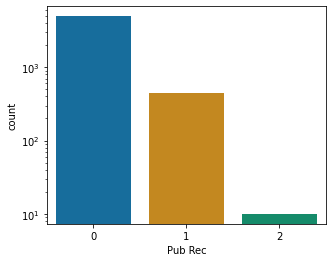

In [235]:
fig,ax = plt.subplots(figsize = (5,4))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Pub Rec')

### Analysis of Issued Month & Year


In [236]:
dfMonthYear = loanData['issue_d'].str.partition("-", True)     
loanData['issue_month']=dfMonthYear[0]                       
loanData['issue_year']='20' + dfMonthYear[2]

In [237]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti_groups,InstallmentGrp,FundedAmtInvGrp,LoanAmtGrp,DtiGrp,InterestRateGrp,OpenAccGrp,RevolUtilGrp,TotalAccGrp,AnnualIncGrp
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,24-30,145-274,0-5k,0-5k,24-30,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0-6,14-145,0-5k,0-5k,0-6,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,6-12,14-145,0-5k,0-5k,6-12,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,18-24,274-403,5k-10k,5k-10k,18-24,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,6-12,145-274,0-5k,0-5k,6-12,5%-9%,2-10,20-40,2-20,31k-58k


Text(0.5, 0, 'Issue Year')

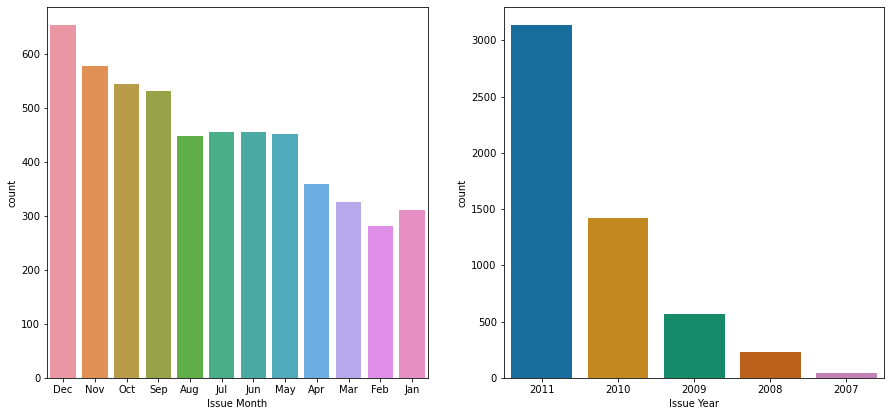

In [171]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Issue Month')
plt.subplot(222)
sns.countplot(x='issue_year', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Issue Year')

### Analysis of Installment, dti and loan_amnt 

In [238]:
loanData['InstallmentGrp'] = pd.cut(loanData['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loanData['FundedAmtInvGrp'] = pd.cut(loanData['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loanData['LoanAmtGrp'] = pd.cut(loanData['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loanData['DtiGrp'] = pd.cut(loanData['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

Text(0.5, 0, 'Funded Amount')

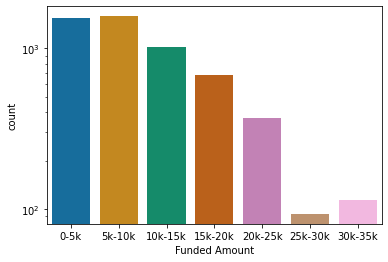

In [239]:
fig,ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='FundedAmtInvGrp', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Funded Amount')

Text(0.5, 0, 'Loan Amount')

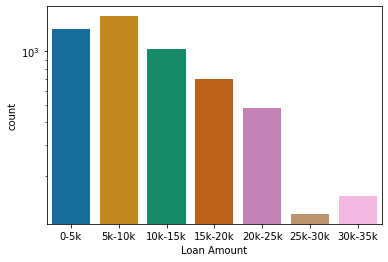

In [240]:
fig,ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='LoanAmtGrp', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Loan Amount')

Text(0.5, 0, 'DTI')

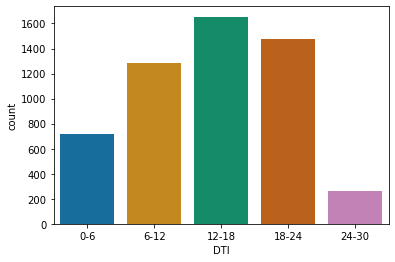

In [241]:
sns.countplot(x='DtiGrp', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('DTI')

Text(0.5, 0, 'Installment Group')

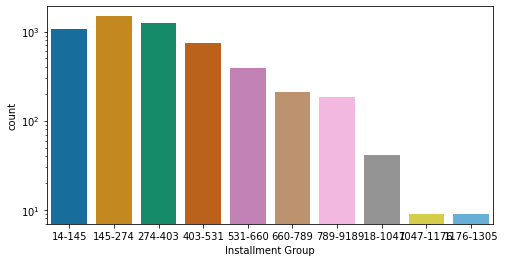

In [242]:
fig,ax = plt.subplots(figsize = (8,4))
ax.set_yscale('log')
sns.countplot(x='InstallmentGrp', data=loanData[loanData['loan_status']=='Charged Off'])
plt.xlabel('Installment Group')

# Report/ Suggestion As per Data Analysis

### There is a probability of defaulting when : 

- Loan applicants having house_ownership as 'RENT'
- Loan applicants who lend loan to use the loan in order to clear other debts/ loan
- Loan applicants who receive interest @ 13-17%
- Loan applicants who falls the income range between 31201 - 58402 amount
- Loan applicants who have 20 to 37 open account
- Loan applicants with job length of 10 and above
- When funded amount by investor falls between 5000 to 10000
- Loan amount is between 5429 to 10357
- DTI is between 12 to 18
- When monthly installments range between 145 to 274
- Term of 36 months
- When loan STATUS is NOT VERIFIED
- When the Number of enquiries in last 6 months is 0
- When the Number of derogatory public records is 0
- When the purpose is 'debt_consolidation'


## Analysis of Annual Income

- Checking the relationship between Annual income and the purpose of loan taken/ applied

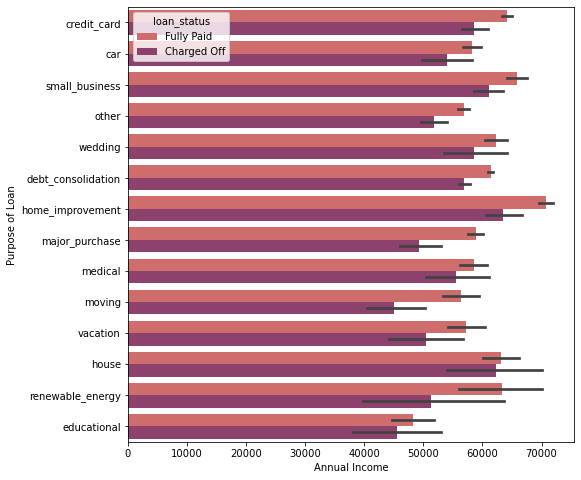

In [243]:
plt.figure(figsize=(8,8))
sns.barplot(data =loanData,x='annual_inc', y='purpose', hue ='loan_status',palette="flare")
plt.xlabel('Annual Income')
plt.ylabel('Purpose of Loan')
plt.show()

- Number of loans applied and defaulted are the highest in number for "debt_consolation" 
- Applicants with higher salary usually applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

- Checking the relationship between Annual income and the Home Ownership

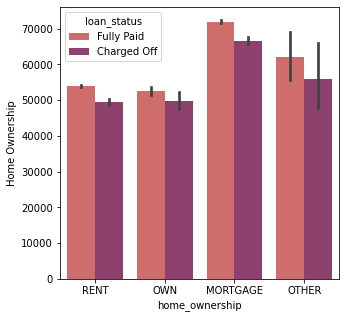

In [244]:
plt.figure(figsize=(5,5))
sns.barplot(data =loanData,x='home_ownership', y='annual_inc', hue ='loan_status',palette="flare")
plt.ylabel('Annual Income')
plt.ylabel('Home Ownership')
plt.show()

- Checking the relationship between Annual income and the Loan Amount

Text(0, 0.5, 'Loan Amount')

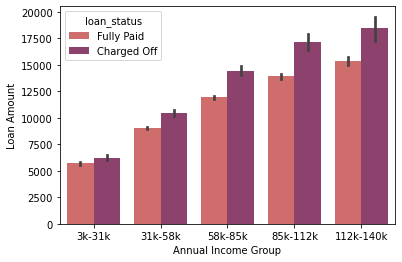

In [245]:
sns.barplot(x = "AnnualIncGrp", y = "loan_amnt", hue = 'loan_status', data = loanData,palette="flare")
plt.xlabel('Annual Income Group')
plt.ylabel('Loan Amount')

- In above figure in all the Income groups, loan_amount is higher for people who defaulted

- Now we are checking the relationship between Annual income and the Rate of Interest

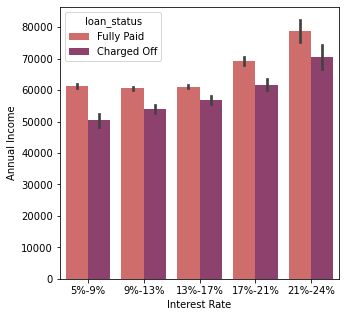

In [246]:
plt.figure(figsize=(5,5))
sns.barplot(data =loanData,x='InterestRateGrp', y='annual_inc', hue ='loan_status',palette="flare")
plt.ylabel('Annual Income')
plt.xlabel('Interest Rate')
plt.show()

## Analysing  Loan Amount with other columns

- Comparision between Loan Amount and Interest Rate

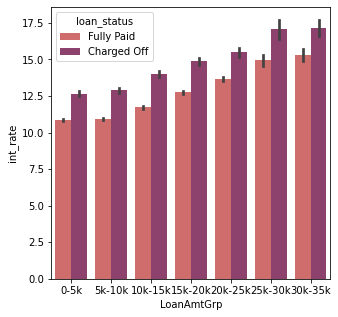

In [247]:
plt.figure(figsize=(5,5))
sns.barplot(data =loanData,x='LoanAmtGrp', y='int_rate', hue ='loan_status',palette="flare")
plt.show()

- Comparision between Loan Amount and Loan purpose

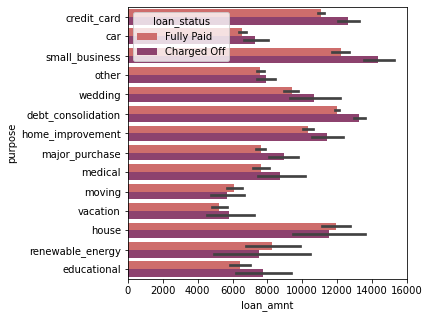

In [248]:
plt.figure(figsize=(5,5))
sns.barplot(data =loanData,x='loan_amnt', y='purpose', hue ='loan_status',palette="flare")
plt.show()

- Comparision between Loan Amount and House Ownership

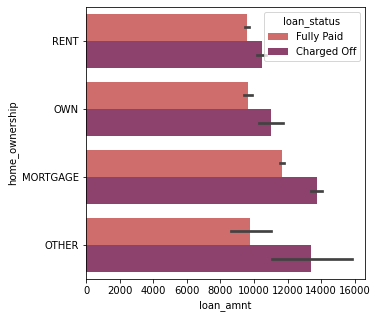

In [249]:
plt.figure(figsize=(5,5))
sns.barplot(data =loanData,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="flare")
plt.show()

- Comparision between Loan Amount and Grade

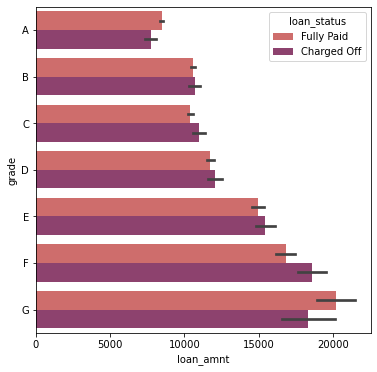

In [262]:
plt.figure(figsize=(6,6))
sns.barplot(data =loanData,x='loan_amnt', y='grade', hue ='loan_status',palette="flare", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

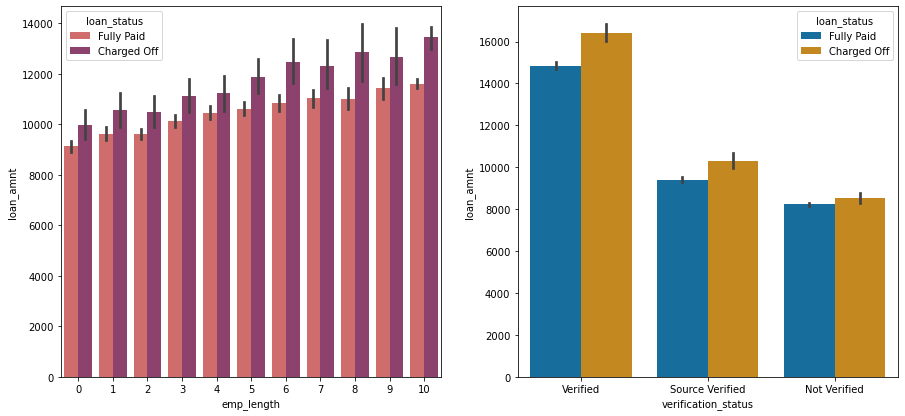

In [255]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.barplot(data =loanData,y='loan_amnt', x='emp_length', hue ='loan_status',palette="flare")
plt.subplot(222)
sns.barplot(data =loanData,y='loan_amnt', x='verification_status', hue ='loan_status')


### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### Comparison between Grade and Interest Rate

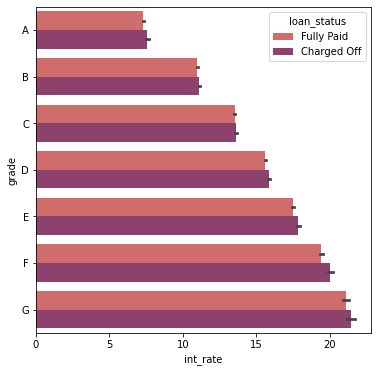

In [256]:
plt.figure(figsize=(6,6))
sns.barplot(data =loanData,x='int_rate', y='grade', hue ='loan_status',palette="flare", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

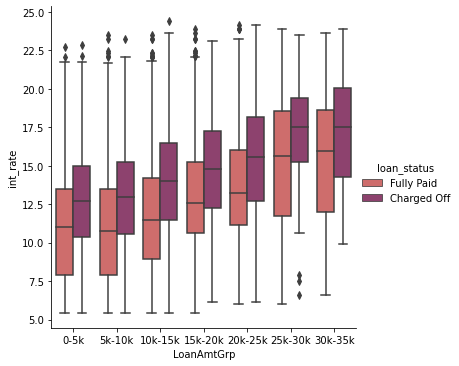

In [260]:
plt.tight_layout()
sns.catplot(data =loanData,y ='int_rate', x ='LoanAmtGrp', hue ='loan_status',palette="flare",kind = 'box')

- Interest rate for CHARGED OFF loans is pretty high than that of FULLY PAIN loans in all the loan_amount groups, which is great driving factor for loan defaulting

<Figure size 432x432 with 0 Axes>

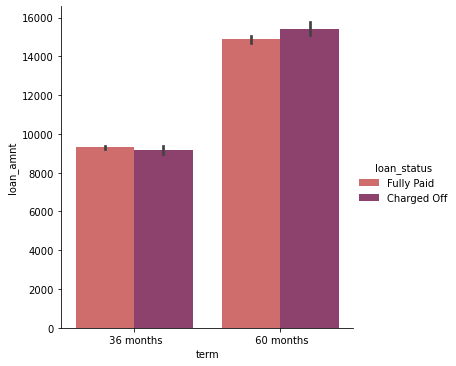

In [257]:
plt.figure(figsize=(6,6))
sns.catplot(x = 'term', y = 'loan_amnt', data = loanData,hue = 'loan_status',palette="flare", kind = 'bar')

# Report/ Suggestion As per Data Analysis

### Probability of Defaulting : 

- When applicants lending loan for their 'home improvement' and having income of 60k to 70k
- When applicants, home ownership is 'MORTGAGE and having income of 60-70k
- When applicants have receive interest @ 21 to 24% and having income of 70k-80k
- When applicants have lend a loan between 30k to 35k and have to pay interest rate of 15 to 17.5 %
- When applicants have lend a loan for his/her SMALL business and the loan amount is >14k
- When applicants having home ownership is 'MORTGAGE and having loan of 14-16k
- When applicants falls in grade F and loan amount in range of 15k to 20k
- When applicant's job length is 10 Years and loan range is between 12k to 14k 
- When the loan amount get verified and loan range is above 16k